### 1.Data understanding and Preparation:

In [1]:
#Import the required set of libraries and work on describing data,size of data etc.
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike = pd.read_csv("day.csv")

In [4]:
bike.shape

(730, 16)

In [5]:
#dataframe describe
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### a.Identify the categorical and continuous feature 

In [6]:
# Understanding the attribute names
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### b.Drop unnecessary variables

In [7]:
# Dropping unnecessary columns:instant,dteday,casual,resgistered
bike.drop(['instant','dteday','casual','registered'],axis='columns', inplace=True)

#### c.Check the data-type of all the columns and make necessary changes if required 

In [8]:
# dataframe info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# season column values
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# Mapping season column the the respective categorical values
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [11]:
# Checking season column after mapping
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# yr column values
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [13]:
# Mapping yr column the the respective categorical values
bike['yr'] = bike['yr'].map({0: 'yr2018', 1: 'yr2019'})

In [14]:
# Checking yr column after mapping
bike.yr.value_counts()

yr2019    365
yr2018    365
Name: yr, dtype: int64

In [15]:
# mnth column values
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [16]:
# Mapping mnth column the the respective categorical values
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [17]:
# Checking mnth column after mapping
bike.mnth.value_counts()

Jan    62
Oct    62
Jul    62
May    62
Mar    62
Aug    62
Dec    62
Sep    60
Nov    60
Jun    60
Apr    60
Feb    56
Name: mnth, dtype: int64

In [18]:
# holiday column values
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
# Map  holiday column to the categorical values
bike['holiday'] = bike['holiday'].map({0: 'Not a holiday', 1: 'Holiday'})

In [20]:
# Checking holiday column after mapping
bike.holiday.value_counts()

Not a holiday    709
Holiday           21
Name: holiday, dtype: int64

In [21]:
# weekday column values
bike.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [22]:
# Map weekday column
bike['weekday'] = bike['weekday'].map({0: 'Sun', 1: 'Mon',2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

In [23]:
# Check the count after mapping
bike.weekday.value_counts()

Mon    105
Tue    105
Sun    104
Wed    104
Fri    104
Sat    104
Thu    104
Name: weekday, dtype: int64

In [24]:
# working day column
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [25]:
# Map workingday column to the categorical values
bike['workingday'] = bike['workingday'].map({0: 'Not a workingday', 1: 'Workingday'})

In [26]:
# Checking working day column after mapping
bike.workingday.value_counts()

Workingday          504
Not a workingday    226
Name: workingday, dtype: int64

In [27]:
# weathersit column values
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
# Map weathersit column to the categorical values
bike['weathersit'] = bike['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [29]:
# Checking weathersit column after mapping
bike.weathersit.value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                            463
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               246
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     21
Name: weathersit, dtype: int64

In [30]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


### 2.Data Visualisation:

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#### a.Perform EDA to understand various variables

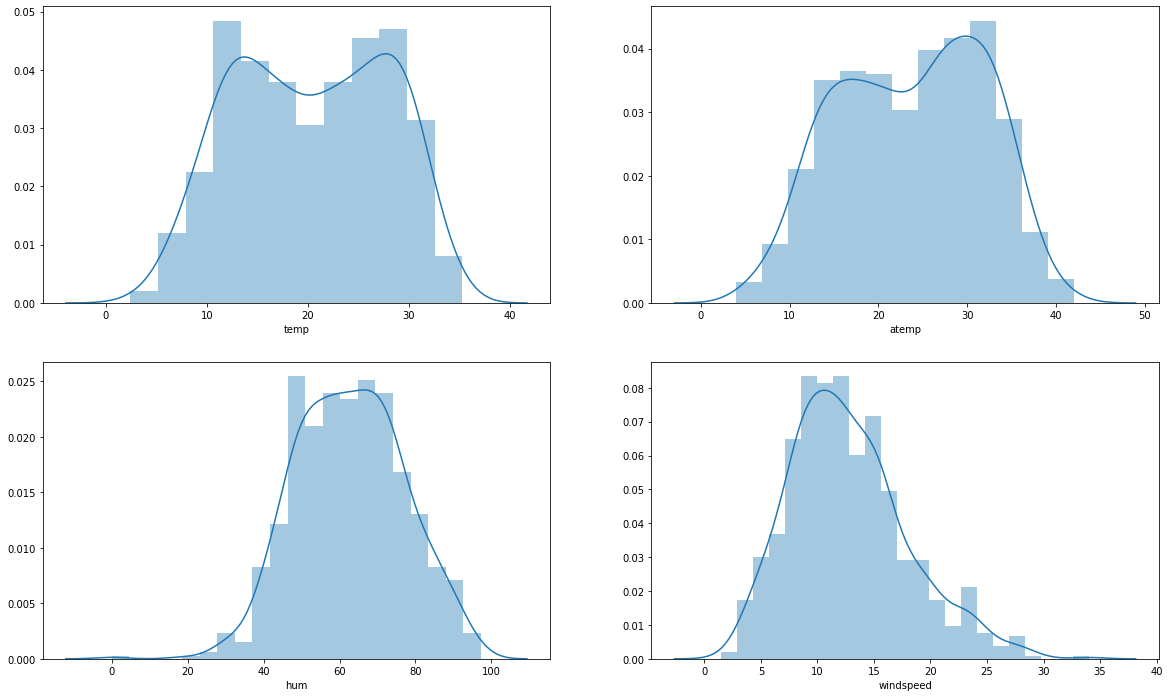

In [32]:
# Visualizing numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.distplot(bike['temp'])
plt.subplot(2,2,2)
sns.distplot(bike['atemp'])
plt.subplot(2,2,3)
sns.distplot(bike['hum'])
plt.subplot(2,2,4)
sns.distplot(bike['windspeed'])
plt.show()

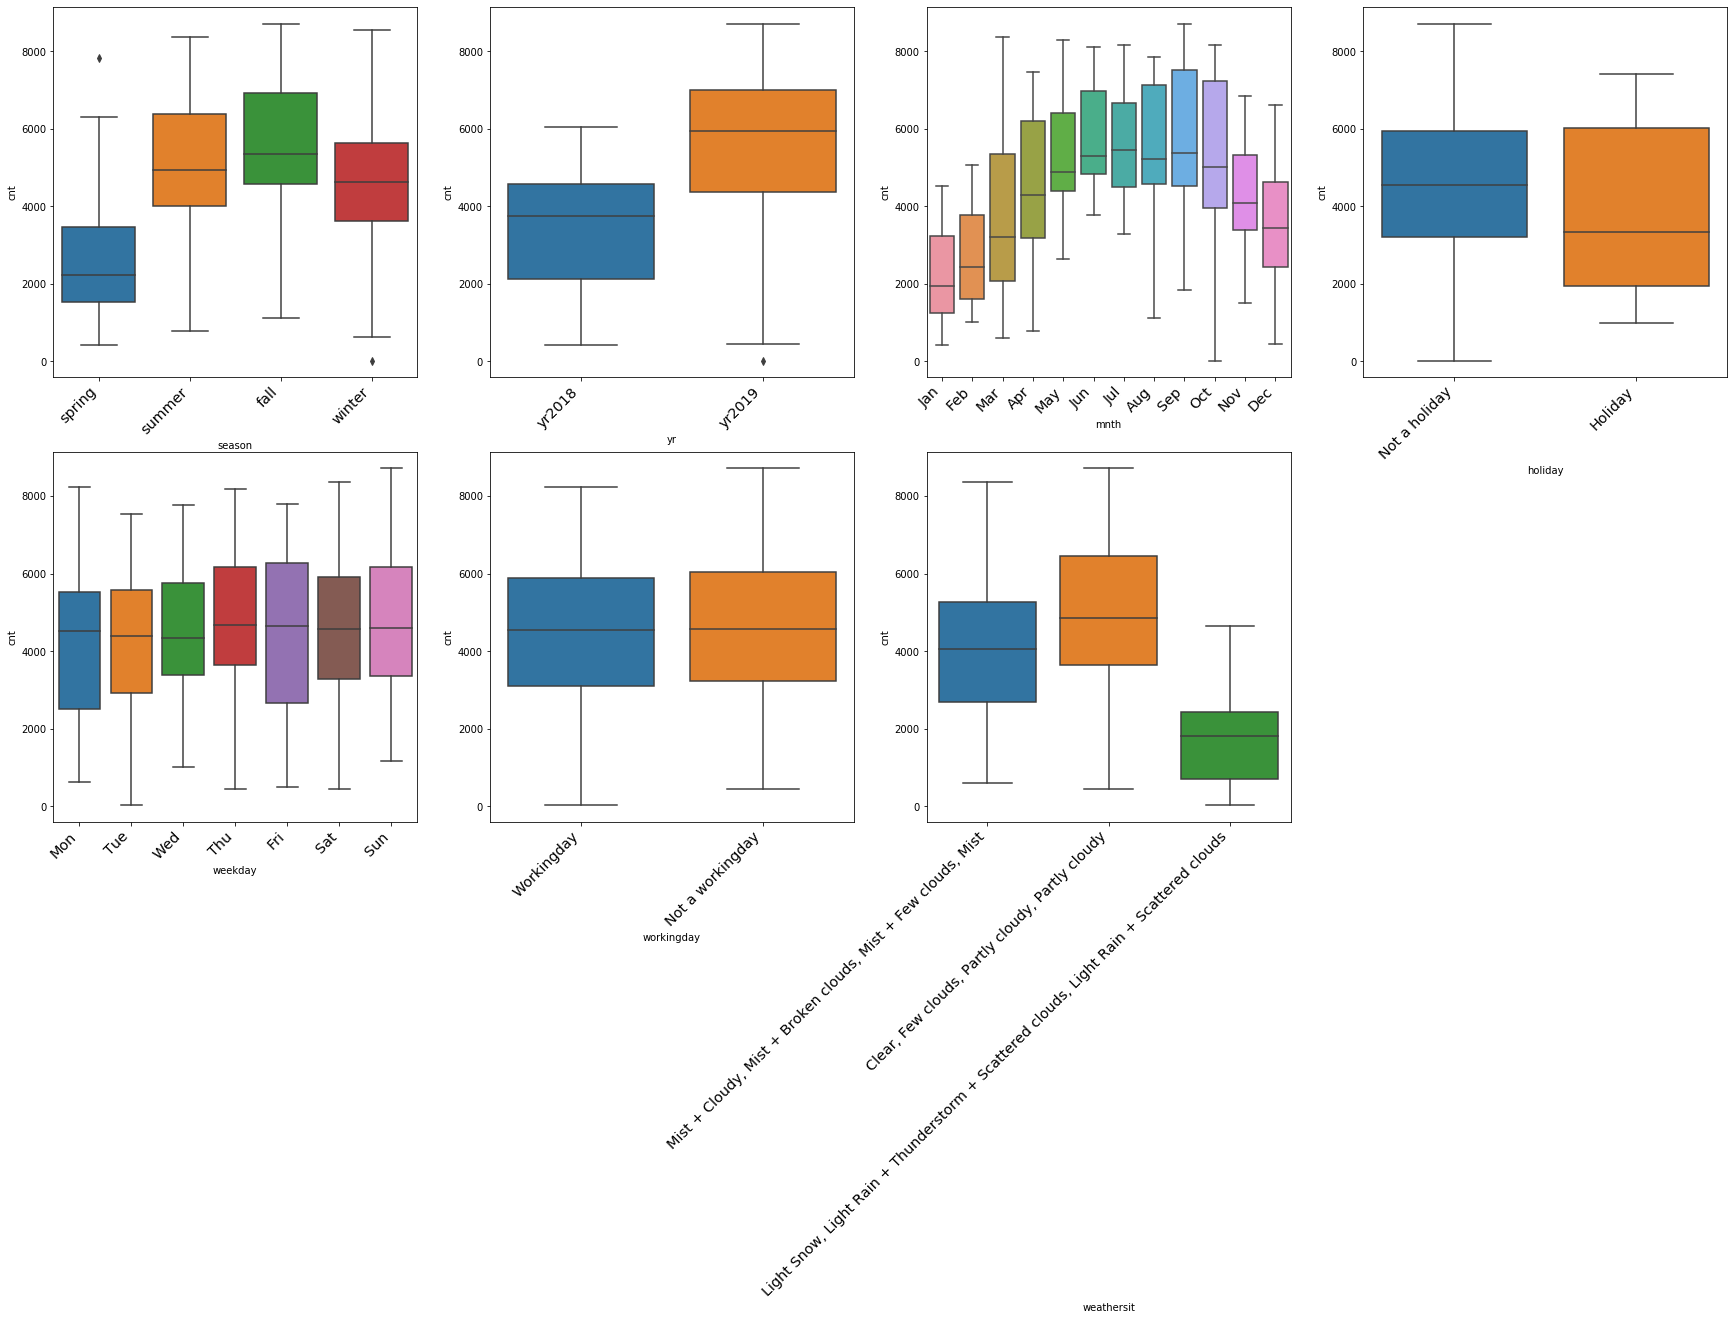

In [33]:
# Visualize categorical variables
plt.figure(figsize=(30, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light',fontsize='x-large')
plt.show()

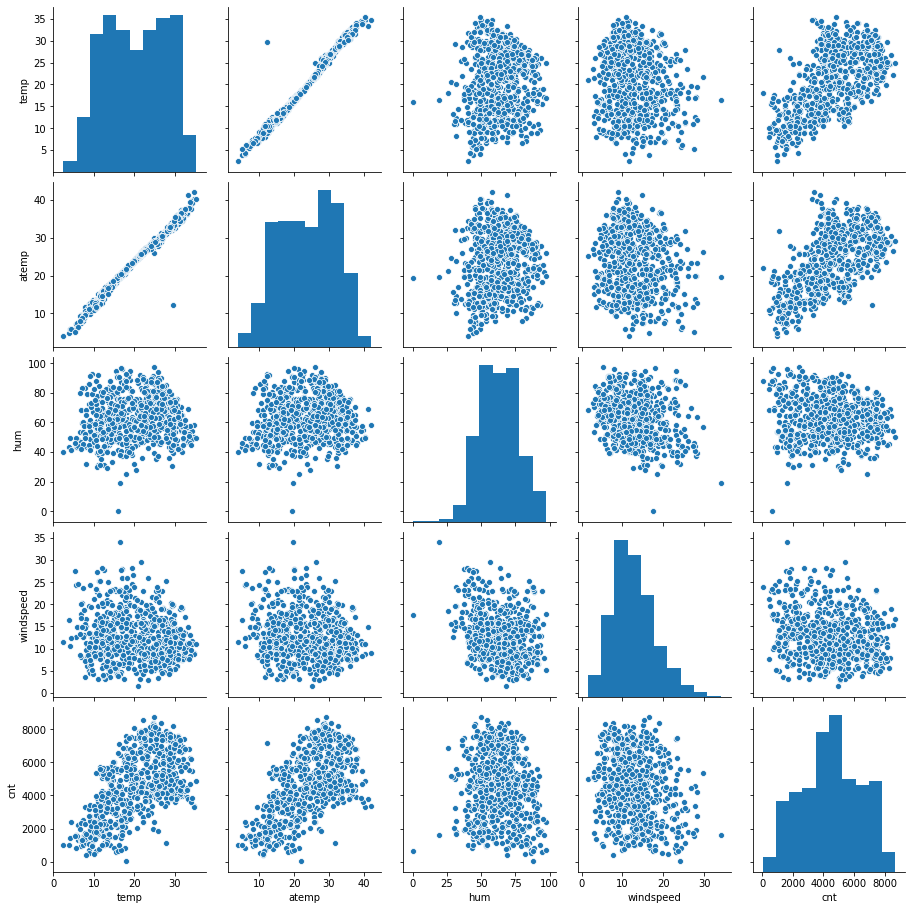

In [34]:
# Pairplot for numerical variables
num=['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bike[num])
plt.show()

#### b.Check the correlation between the variables

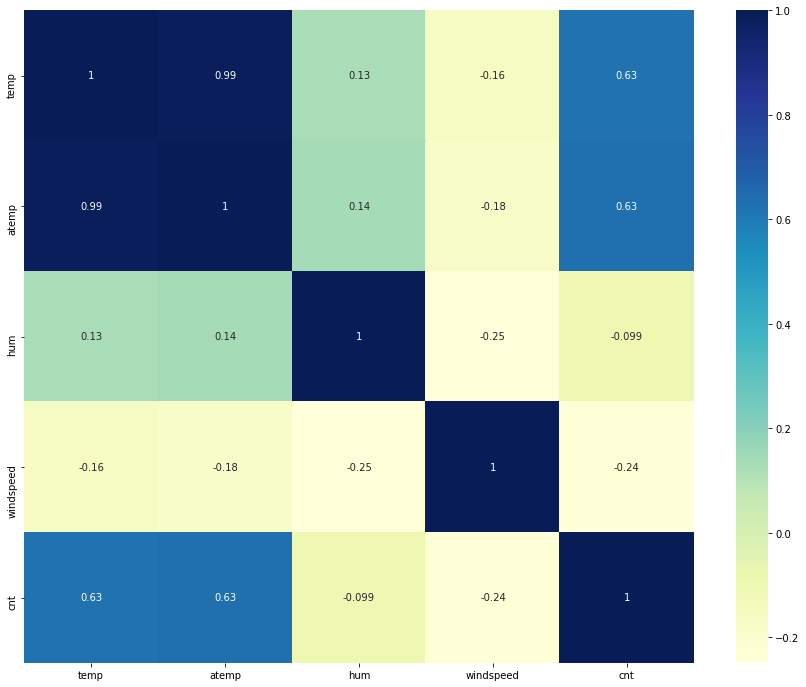

In [35]:
plt.figure(figsize=(15,12))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")

In [36]:
#Visualize

In [37]:
#Since temp and atemp are the most multicollinear variables , dropping atemp
bike.drop(['atemp'],axis='columns', inplace=True)

In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


### 3.Data Preparation:

#### a.Create dummy variables for all the categorical features

In [39]:
# Create dummy variables for all categorical features
# season,yr,mnth,holiday,weekday,workingday,weathersit

def dumy(df,var):
    # Dropping the 1st column from created dataframe
    x = pd.get_dummies(df[var], drop_first = True)
    # Add the results to the original bike dataframe
    df = pd.concat([df, x], axis = 1)
    # Drop 'season' as we have created the dummies for it
    df.drop([var], axis = 1, inplace = True)
    return df


In [40]:
# create dummy for seasons
bike=dumy(bike,'season')
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,yr2018,Jan,Not a holiday,Mon,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,0
1,yr2018,Jan,Not a holiday,Tue,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,0
2,yr2018,Jan,Not a holiday,Wed,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,0
3,yr2018,Jan,Not a holiday,Thu,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,0
4,yr2018,Jan,Not a holiday,Fri,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,0


In [41]:
# create dummy for yr
bike=dumy(bike,'yr')
bike.head()

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,yr2019
0,Jan,Not a holiday,Mon,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,0,0
1,Jan,Not a holiday,Tue,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,0,0
2,Jan,Not a holiday,Wed,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,0,0
3,Jan,Not a holiday,Thu,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,0,0
4,Jan,Not a holiday,Fri,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,0,0


In [42]:
# create dummy for mnth
bike=dumy(bike,'mnth')
bike.head()

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Not a holiday,Mon,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,Not a holiday,Tue,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,Not a holiday,Wed,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Not a holiday,Thu,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Not a holiday,Fri,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [43]:
# create dummy for holiday
bike=dumy(bike,'holiday')
bike.head()

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Not a holiday
0,Mon,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,Tue,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Wed,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Thu,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,Fri,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [44]:
# create dummy for weekday
bike=dumy(bike,'weekday')
bike.head()

,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,...,Nov,Oct,Sep,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed
0,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,Workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,Workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# create dummy for workingday
bike=dumy(bike,'workingday')
bike.head()

,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,Aug,...,Oct,Sep,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed,Workingday
0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,69.6087,16.652113,801,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
2,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [46]:
# create dummy for weathersit
bike=dumy(bike,'weathersit')
bike.head()

,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,Aug,Dec,...,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed,Workingday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


#### b.Divide the data into train and test

In [47]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

#### c.Perform Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [51]:
df_train.head()

,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,Aug,Dec,...,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed,Workingday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,0.509887,0.575354,0.300794,0.864243,0,0,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1


In [52]:
df_train.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,Aug,Dec,...,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed,Workingday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,...,0.974510,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.711765,0.029412,0.343137
std,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,...,0.157763,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.453386,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### d.Divide data into X and y 

In [53]:
y_train = df_train.pop('cnt')
X_train = df_train

### 4.Data Modelling and Evaluation

#### a.Create Linear Regression model using mixed approach

In this approach we will be creating the model with all the variables at first and then we will be removing variables one by one checking the p-values and vif values till we ge the best model out of those.

In [54]:
# Check all the columns of the dataframe

bike.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter',
       'yr2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Not a holiday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Workingday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [55]:
# Build a linear model
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [56]:
lr.params

const                                                                                      0.259119
temp                                                                                       0.445458
hum                                                                                       -0.157315
windspeed                                                                                 -0.183046
spring                                                                                    -0.043705
summer                                                                                     0.042243
winter                                                                                     0.110897
yr2019                                                                                     0.230857
Aug                                                                                        0.021507
Dec                                                                                       -0.045669


In [57]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.33e-179
Time:                        14:13:48   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Not a holiday,266.67
25,Workingday,217.91
21,Sun,41.94
20,Sat,39.72
1,hum,39.39
0,temp,38.92
3,spring,12.53
5,winter,12.26
4,summer,8.15
16,Oct,6.55


In [60]:
# Removing workingday as it is having high p-value as well as high VIF
X = X_train.drop('Workingday',axis='columns')

In [61]:
# Bulding a 2nd model after removing Workingday
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
# Print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.08e-180
Time:                        14:13:49   Log-Likelihood:                 523.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     482   BIC:                            -872.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [63]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,39.31
0,temp,38.74
18,Not a holiday,31.22
3,spring,12.46
5,winter,12.19
4,summer,8.01
16,Oct,6.54
7,Aug,6.34
15,Nov,6.11
11,Jul,5.64


In [64]:
# Removing workingday as it is having high p-value as well as high VIF
X = X.drop('Oct',axis='columns')

In [65]:
# Build a 3rd fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [66]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     105.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.94e-181
Time:                        14:13:49   Log-Likelihood:                 523.41
No. Observations:                 510   AIC:                            -992.8
Df Residuals:                     483   BIC:                            -878.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [67]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,38.21
1,hum,37.17
17,Not a holiday,30.68
3,spring,12.28
5,winter,8.04
4,summer,7.17
2,windspeed,5.20
7,Aug,5.17
11,Jul,4.69
10,Jan,4.39


In [68]:
# Dropping Jun as it is having a very high p-value
X = X.drop('Jun', axis='columns')

In [69]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [70]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.60e-182
Time:                        14:13:50   Log-Likelihood:                 523.41
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     484   BIC:                            -884.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [71]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.57
16,Not a holiday,30.29
0,temp,25.88
3,spring,11.80
4,summer,6.95
5,winter,6.89
2,windspeed,5.13
10,Jan,4.37
7,Aug,3.31
9,Feb,3.28


In [72]:
# Dropping Mar as it is having a very high p-value
X = X.drop('Mar', axis='columns')

In [73]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [74]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.18e-183
Time:                        14:13:51   Log-Likelihood:                 523.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     485   BIC:                            -890.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [75]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.16
15,Not a holiday,29.59
0,temp,24.32
3,spring,8.50
5,winter,6.88
4,summer,6.77
2,windspeed,5.13
7,Aug,3.30
11,Jul,2.93
10,Jan,2.44


In [76]:
# Dropping Sat as it is having a very high p-value
X = X.drop('Sat', axis='columns')

In [77]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.79e-184
Time:                        14:13:52   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     486   BIC:                            -897.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [79]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.16
15,Not a holiday,29.34
0,temp,24.12
3,spring,8.36
5,winter,6.76
4,summer,6.65
2,windspeed,5.13
7,Aug,3.27
11,Jul,2.90
10,Jan,2.44


In [80]:
# Dropping Thu as it is having a very high p-value
X = X.drop('Thu', axis='columns')

In [81]:
# Build a 7th fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.27e-185
Time:                        14:13:52   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [83]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.12
15,Not a holiday,29.09
0,temp,24.10
3,spring,8.35
5,winter,6.74
4,summer,6.62
2,windspeed,5.13
7,Aug,3.27
11,Jul,2.89
10,Jan,2.44


In [84]:
# Dropping Sun as it is having a very high p-value
X = X.drop('Sun', axis='columns')

In [85]:
# Build a 8th fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.36e-186
Time:                        14:13:53   Log-Likelihood:                 523.18
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     488   BIC:                            -909.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [87]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,36.12
15,Not a holiday,29.05
0,temp,24.08
3,spring,8.34
5,winter,6.72
4,summer,6.61
2,windspeed,5.11
7,Aug,3.27
11,Jul,2.88
10,Jan,2.44


In [88]:
# Dropping Aug as it is having a very high p-value
X = X.drop('Aug', axis='columns')

In [89]:
# Build a 9th fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [90]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.05e-187
Time:                        14:13:54   Log-Likelihood:                 522.84
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     489   BIC:                            -914.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [91]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,35.30
14,Not a holiday,27.69
0,temp,22.52
3,spring,6.08
2,windspeed,5.08
5,winter,4.46
4,summer,3.72
9,Jan,2.43
19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.35
6,yr2019,2.11


In [92]:
# Dropping Wed as it is having a very high p-value
X = X.drop('Wed', axis='columns')

In [93]:
# Build a 10th fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [94]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.12e-188
Time:                        14:13:54   Log-Likelihood:                 522.13
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     490   BIC:                            -919.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [95]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,34.87
14,Not a holiday,27.34
0,temp,22.45
3,spring,6.06
2,windspeed,5.08
5,winter,4.41
4,summer,3.71
9,Jan,2.42
18,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
6,yr2019,2.11


In [96]:
# Dropping May as it is having a very high p-value
X = X.drop('May', axis='columns')

In [97]:
# Build a 11th fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.44e-188
Time:                        14:13:55   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     491   BIC:                            -924.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [99]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,34.75
13,Not a holiday,27.07
0,temp,22.26
3,spring,6.04
2,windspeed,5.01
5,winter,4.41
4,summer,3.09
9,Jan,2.42
17,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",2.34
6,yr2019,2.10


In [100]:
# Dropping hum as it is having a very high p-value
X = X.drop('hum', axis='columns')

In [101]:
# Build a 12th fitted model
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [102]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.02e-186
Time:                        14:13:56   Log-Likelihood:                 513.04
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     492   BIC:                            -913.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [103]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Not a holiday,24.81
0,temp,13.91
2,spring,5.44
1,windspeed,4.86
4,winter,3.74
3,summer,2.77
8,Jan,2.31
5,yr2019,2.08
7,Feb,1.90
10,Nov,1.80


In [104]:
# Dropping Feb as it is having a very high p-value
X = X.drop('Feb', axis='columns')

In [105]:
# Build a 13th fitted model
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [106]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.20e-186
Time:                        14:13:57   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -988.6
Df Residuals:                     493   BIC:                            -916.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [107]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Not a holiday,24.52
0,temp,13.63
1,windspeed,4.86
2,spring,4.26
4,winter,3.73
3,summer,2.77
5,yr2019,2.08
9,Nov,1.78
7,Jan,1.71
8,Jul,1.61


In [108]:
# Dropping Summer as it is having a very high p-value
X = X.drop('summer', axis='columns')

In [109]:
# Build a 14th fitted model
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()

In [110]:
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.04e-186
Time:                        14:13:57   Log-Likelihood:                 508.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     494   BIC:                            -917.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [111]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Not a holiday,19.86
0,temp,13.21
1,windspeed,4.59
2,spring,2.89
3,winter,2.81
4,yr2019,2.07
8,Nov,1.78
6,Jan,1.71
14,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
5,Dec,1.51


In [112]:
# Dropping Mon as it is having a very high p-value
X = X.drop('Mon', axis='columns')

In [113]:
# Build a 15th fitted model
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()

In [114]:
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     185.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.14e-186
Time:                        14:13:58   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     495   BIC:                            -918.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [115]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Not a holiday,19.58
0,temp,13.20
1,windspeed,4.58
2,spring,2.89
3,winter,2.81
4,yr2019,2.07
8,Nov,1.78
6,Jan,1.71
13,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
5,Dec,1.51


In [116]:
# Dropping Tue as it is having a very high p-value
X = X.drop('Tue', axis='columns')

In [117]:
# Build a 16th fitted model
X_train_lm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_lm).fit()

In [118]:
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.08e-186
Time:                        14:13:58   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [119]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Not a holiday,19.58
0,temp,13.19
1,windspeed,4.56
2,spring,2.89
3,winter,2.79
4,yr2019,2.07
8,Nov,1.78
6,Jan,1.71
12,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
5,Dec,1.51


In [120]:
# Dropping Nov as it is having a very high p-value
X = X.drop('Nov', axis='columns')

In [121]:
# Build a 17th fitted model
X_train_lm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_lm).fit()

In [122]:
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.02e-186
Time:                        14:13:59   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [123]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Not a holiday,19.52
0,temp,13.08
1,windspeed,4.53
2,spring,2.89
4,yr2019,2.07
3,winter,1.93
6,Jan,1.71
11,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
7,Jul,1.38
5,Dec,1.33


In [124]:
# Dropping Dec as it is having a very high p-value
X = X.drop('Dec', axis='columns')

In [125]:
# Build a 18th fitted model
X_train_lm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_lm).fit()

In [126]:
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.13e-186
Time:                        14:14:00   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [127]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Not a holiday,18.92
0,temp,12.75
1,windspeed,4.50
2,spring,2.85
4,yr2019,2.07
3,winter,1.79
5,Jan,1.65
10,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.58
6,Jul,1.37
7,Sep,1.20


In [128]:
# Dropping Jan as it is having a very high p-value
X = X.drop('Jan', axis='columns')

In [129]:
# Build a 19th fitted model
X_train_lm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_lm).fit()

In [130]:
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.16e-186
Time:                        14:14:01   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [131]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Not a holiday,18.40
0,temp,12.36
1,windspeed,4.47
2,spring,2.44
4,yr2019,2.07
3,winter,1.78
9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",1.57
5,Jul,1.37
6,Sep,1.20
8,"Light Snow, Light Rain + Thunderstorm + Scatte...",1.08


#### b.Check various assumptions(Error distributed normally or not)

In [132]:
y_train_price = lr_18.predict(X_train_lm)

Text(0.5, 0, 'Errors')

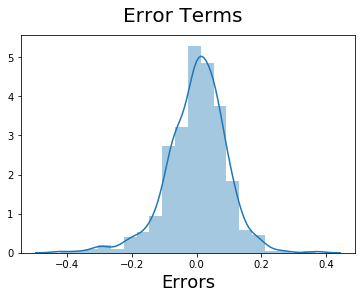

In [133]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From above we can see that the error terms is normally distributed , the mean being zero. Now we can go aheead.

#### c. Check Adjusted R-squared for both test and train data

In [134]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [135]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   temp                                                                                     219 non-null    float64
 1   hum                                                                                      219 non-null    float64
 2   windspeed                                                                                219 non-null    float64
 3   cnt                                                                                      219 non-null    float64
 4   spring                                                                                   219 non-null    uint8  
 5   summer                                                         

In [136]:
df_test.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,yr2019,Aug,Dec,...,Not a holiday,Mon,Sat,Sun,Thu,Tue,Wed,Workingday,"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,...,0.963470,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.639269,0.027397,0.319635
std,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,...,0.188034,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.481313,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Dividing X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [138]:
# Adding constant variable to test dataframe
X_test_mf = sm.add_constant(X_test)

In [139]:
X_test_mf.columns

Index(['const', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'yr2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Not a holiday', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Workingday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [140]:
X_train_lm.columns

Index(['const', 'temp', 'windspeed', 'spring', 'winter', 'yr2019', 'Jul',
       'Sep', 'Not a holiday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [141]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_mf = X_test_mf.drop(["hum", "summer", "Aug", "Dec", "Feb", "Jan", "Jun", "Mar", "May", "Nov", "Oct", "Mon", "Sat", "Sun", "Thu", "Wed", "Tue", "Workingday"], axis = 1)

In [142]:
X_test_mf.columns

Index(['const', 'temp', 'windspeed', 'spring', 'winter', 'yr2019', 'Jul',
       'Sep', 'Not a holiday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [143]:
# Making predictions using the fourth model

y_pred_mf = lr_18.predict(X_test_mf)

Text(0, 0.5, 'y_pred')

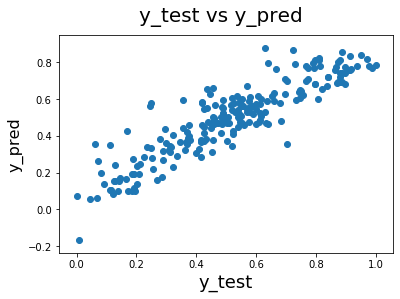

In [144]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_mf)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [145]:
# Find r-squared of the test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_mf)

0.79537778569219

#### d.Reporting the final model 

Our final model is lr_18 and the equation of our best fitted line is:

$ cnt = 0.145 \times temp + (-0.139) \times windspeed + (-0.11) \times spring + 0.047 \times winter + 0.234 \times yr2019 + (-0.073) \times Jul + 0.058 \times Sep + 0.099 \times (Not a holiday) + (-0.286) \times (Light Snow,Light Rain + Thunderstorm + Scattered clouds,Light Rain + Scattered clouds) + (-0.081) \times (Mist + Cloudy,Mist + Broken clouds,Mist + Few clouds,Mist) $

Final Training model R2 is approx 83% and the R2 of the test data is approx 79.5%